# Explore the Digit Recognizer Competition Dataset

In [1]:
import os
import sys
from dotenv import load_dotenv, find_dotenv
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src import DrDataLoader

load_dotenv(find_dotenv())

def show_helper(image, ax, label=None):
    ax.imshow(tf.reshape(image, [28,28]), cmap='gray_r', interpolation='None')
    if label is not None:
         ax.set_title('Label: {}'.format(label))
    return ax


2022-12-02 13:34:19.722484: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
N = 54000
data_loader = DrDataLoader(Path('../') / Path(os.getenv('RAW_FP'))) #type: ignore
train_ds = data_loader.load_training_data().shuffle(N)
test_ds = data_loader.load_test_data().shuffle(N)

2022-12-02 13:34:29.633236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training set examples

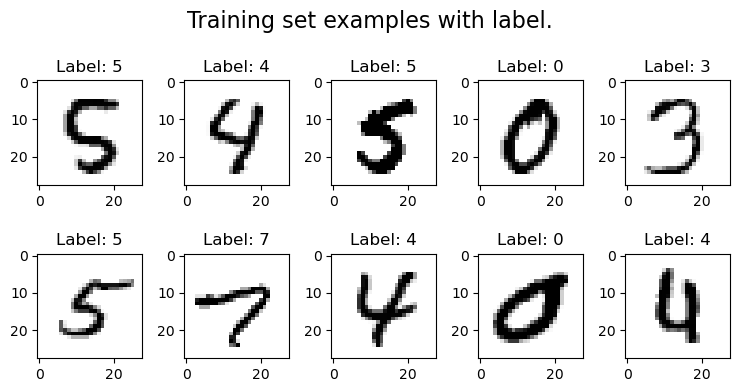

In [3]:
num_row = 2
num_col = 5
num = num_col * num_row
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
i=0
for (im, im_label) in train_ds.take(num):
    ax = axes[i//num_col, i%num_col] #type: ignore
    ax = show_helper(im, ax, im_label)
    i+=1
fig.suptitle('Training set examples with label.', fontsize=16)
plt.tight_layout()
plt.show()

## Test set examples

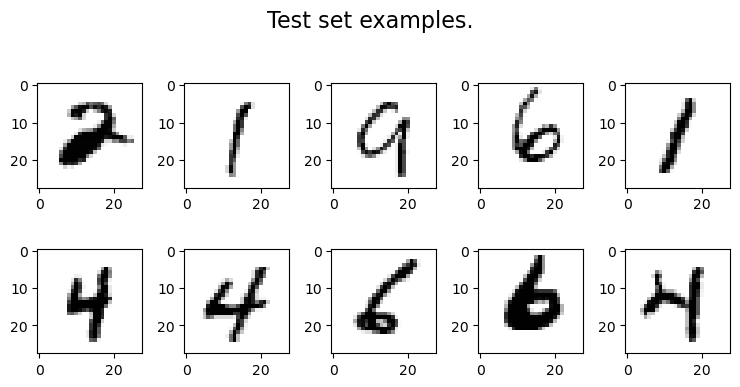

In [4]:
num_row = 2
num_col = 5
num = num_col * num_row
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
i=0
for im in test_ds.take(num):
    ax = axes[i//num_col, i%num_col] #type: ignore
    ax = show_helper(im, ax, None)
    i+=1
fig.suptitle('Test set examples.', fontsize=16)
plt.tight_layout()
plt.show()